# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

변수 간 상관관계 확인하기

<ipython-input-6-e918d739cfed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-6-e918d739cfed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");


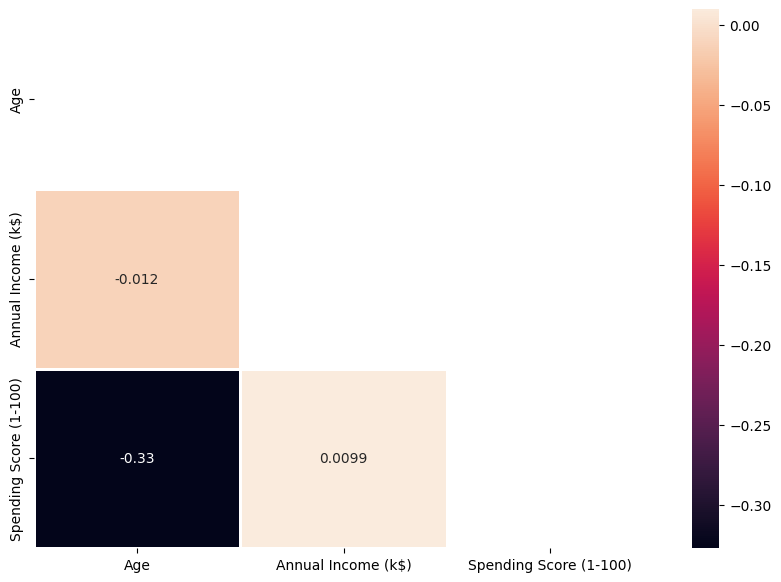

In [6]:
plt.figure(figsize=(10, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

## 2. Clustering

k-means clustering

elbow method로 적합한 k 값 구하기

In [10]:
def elbowOptimizer(data):
    """Plots a Elbow Chart on the data provided"""
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show();

In [11]:
def kmeansTrainer(numberOfClusters, data):
    kmeans = KMeans(n_clusters=numberOfClusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data)
    return (kmeans,labels)

In [18]:
def clusterVisualiser(data, model, noOfClusters, labels, xlabel, ylabel, model_type):
    """Plots Scatter Plot for the clusters on the Data given"""
    color= ['red', 'blue', 'green', 'cyan', 'magenta','purple']
    for i in range(0, noOfClusters):
        plt.scatter(data[labels == i, 0], data[labels == i, 1 ], s=100, c=color[i], label ='Cluster '+str(i+1))
    if model_type == 'KMeans Clustering':
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
                    :, 1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters of customers using '+model_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [12]:
# Clustering dataset on Annual Income and Spending Score
X1 = df.iloc[:, [2, 3]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

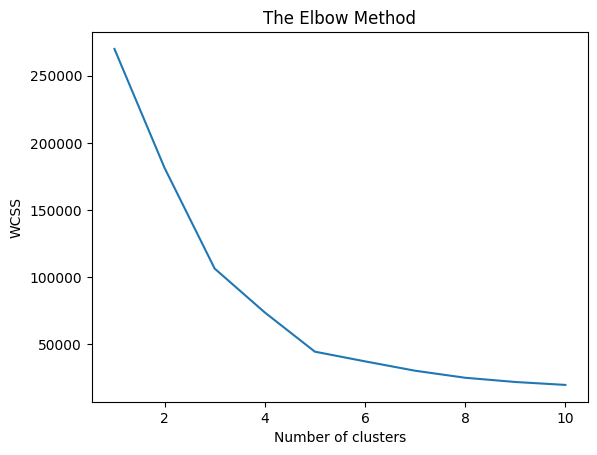

In [15]:
elbowOptimizer(X1)

k=5 로 설정하기

In [16]:
kmeans, labels = kmeansTrainer(5, X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


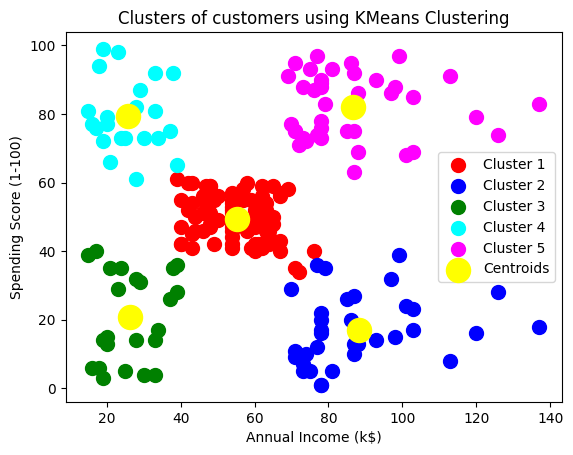

In [19]:
clusterVisualiser(X1, kmeans, 5, labels,
                  'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans Clustering')

## 3. Evaluation

silhouette score 로 성능평가하기

In [31]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X1, labels)
print('The average silhouette_score is :', silhouette_avg)

The average silhouette_score is : 0.30961724215606545


In [32]:
# Clustering dataset on Annual Income and Spending Score
X1 = df.iloc[:, [2, 3]].values

# Running k-means with an optimized number of clusters
kmeans, labels = kmeansTrainer(5, X1)

# Calculate silhouette score
silhouette_avg = silhouette_score(X1, labels)
print('The average silhouette_score for the clusters is :', silhouette_avg)

The average silhouette_score for the clusters is : 0.553931997444648


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

